Antes de comenzar, tendremos que para utilizar estas funciones, se necesita la función objetivo $f$, su gradiente $df$, y el hessiano $ddf$. Definiendo la estructura genérica para los métodos de descenso:

* `f`: Función objetivo
* `df`: Gradiente de la función objetivo.
* `ddf`: El hessiano de la función objetivo.
* `x0`: Punto de inicio.
* `a`: Step size.
* `maxIter`: Número máximo de pasos o iteraciones.
* `e`: Tolerancia para el criterio de paro.
* `stopCriterion`: Criterio de paro.

In [1]:
using LinearAlgebra

1. **Descenso Gradiente Naive con Dirección Aleatoria**

In [2]:
function GradNaiveRand(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]
    errors = []

    for k in 1:maxIter
        # Generar la dirección de descenso al gradiente de forma aleatoria
        d = randn(length(x))

        # Normalizar la dirección de descenso
        d = d/norm(d)

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x_new))

        # Guardar el error
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new    
    end

    # Retornar el punto actual, la secuencia de puntos, la secuencia de valores de la función objetivo, la secuencia de errores, el número de iteraciones
    # Y un indicador que no converge
    return x, x_k, f_k, errors, maxIter, false
end

GradNaiveRand (generic function with 1 method)

2. **Descenso Máximo Naive**

In [3]:
function GradNaiveMax(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    for k in 1:maxIter
        # Calcular la dirección de descenso gradiente
        d = df(x)

        # Asegurarse de que x y d tengan las mismas dimensiones
        if length(x) != length(d)
            throw(DimensionMismatch("x y d deben tener las mismas dimensiones"))
        end

        # Calcular el nuevo punto
        x_new = x - a*d  # Cambiado a restar el gradiente

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x_new))  # Cambiado a x_new

        # Guardar el error
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new
    end

    # Retornar el punto actual, la secuencia de puntos, la secuencia de valores de la función objetivo, la secuencia de errores, el número de iteraciones
    # Y un indicador que no converge
    return x, x_k, f_k, errors, maxIter, false
end

GradNaiveMax (generic function with 1 method)

3. **Descenso Gradiente de Newton**

In [4]:
function GradNewton(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    # Inicializar la matriz identidad para el Hessiano
    H_I = I(length(x0))

    for k in 1:maxIter
        # Calcular la dirección de descenso
        d = - H_I * df(x)

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x))
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualización del Hessiano Inverso
        s = x_new - x
        y = df(x_new) - df(x)
        rho = 1/(y'*s)
        H_I = (I -rho*s*y')*H_I*(I-rho*y*s') + rho*s*s'

        # Actualizar el punto actual
        x = x_new

    end

    return x, x_k, f_k, errors, maxIter, false
end

GradNewton (generic function with 1 method)

4. **Descenso Gradiente de Newton (Hessiano Exacto)**

In [5]:
function GradNewtonExact(f, df, ddf, x0, a, maxIter, e, stopCriterion)

    λ = 1e-6  # Regularización

    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    for k in 1:maxIter
        # Obtener la dirección de descenso
        g = df(x)
        H = ddf(x) + λ * I

        # Resolver el sistema de ecuaciones
        d = -H\g

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x))
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new
    end

    return x, x_k, f_k, errors, maxIter, false
end

GradNewtonExact (generic function with 1 method)

In [6]:
using Plots

function plot_results(x_k, errors)
    # Crear una figura con dos subplots
    plot(layout = (1, 2), size = (1000, 400))

    # Graficar la trayectoria de los puntos
    plot!(subplot = 1)
    scatter!(x -> x[1], x -> x[2], x_k, label = "Trayectoria", title = "Trayectoria de los puntos", xlabel = "x1", ylabel = "x2")

    # Graficar los errores
    plot!(subplot = 2)
    plot!(errors, label = "Errores", title = "Errores por iteración", xlabel = "Iteración", ylabel = "Error", lw = 2)

    # Mostrar la gráfica
    display(plot())
end

plot_results (generic function with 1 method)

**Testeando la función $ f : \R^{2} \to \R $ dada por**

$$f(x,y) = x^{4}+y^{4}-4xy+\frac{1}{2}y + 1$$

In [7]:
function f(x)
    return x[1]^4 + x[2]^4 - 4*x[1]*x[2] + (1/2)*x[2] +1
end

f (generic function with 1 method)

**Gradiente de la función**:

El gradiente $\nabla f(x,y)$

$$ \nabla f(x) = 

\begin{bmatrix}
4x^{3} - 4y \\
4y^{3} - 4x + \frac{1}{2} \\
0 \\
0 \\
\end{bmatrix}

In [8]:
function df(x)
    return [4*x[1]^3 - 4*x[2], 4*x[2]^3 - 4*x[1] + 0.5, 0, 0]
end

df (generic function with 1 method)

**Hessiano de la función**:

El hessiano $H(f(x,y))$

$$ H(f) = 
\begin{bmatrix}
12x^{2} & -4 & 0 & 0\\
-4 & 12y^{2} & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}

In [9]:
function ddf(x)
    return [12*x[1]^2  -4  0  0; 
            -4  12*x[2]^2  0  0; 
            0  0  0  0; 
            0  0  0  0]
end

ddf (generic function with 1 method)

**Punto inicial**: $x_0 = (-3, 1, -3, 1)^{T}$


In [10]:
x0 = [-3.0, 1.0, -3.0, 1.0] 

4-element Vector{Float64}:
 -3.0
  1.0
 -3.0
  1.0

In [11]:
α = 0.1  # Tamaño de paso
maxIter = 900  # Máximo de iteraciones
ε = 1e-6  # Tolerancia
stop_criterion = :gradiente  # Criterio de paro

:gradiente

### Algoritmo de Descenso Gradiente Naive con Dirección Aleatoria

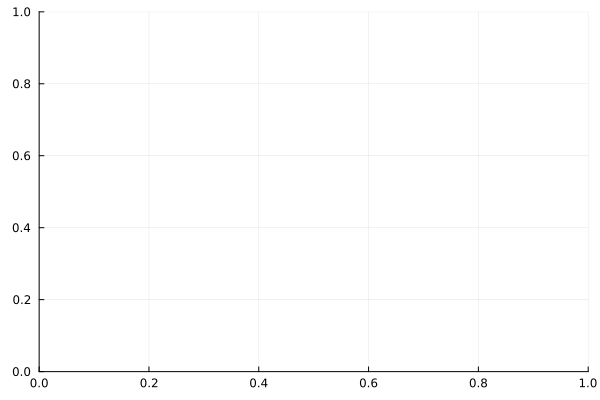

Solución óptima: [-2.999193711693081, 1.0021774043274752, -2.995006247433105, 0.9944092834919303]
Número de iteraciones: 1000000
Valor de f en la solución: 95.44567944557443
Convergencia: false


In [12]:
α = 0.00001  # Tamaño de paso
maxIter = 1000000
x_opt, xk, fk, errores, iteraciones, convergencia = GradNaiveRand(f, df, x0, α, maxIter, ε, stop_criterion)
plot_results(xk, errores)
println("Solución óptima: ", x_opt)
println("Número de iteraciones: ", iteraciones)
println("Valor de f en la solución: ", f(x_opt))
println("Convergencia: ", convergencia)

### Algoritmo de Descenso Máximo Naive

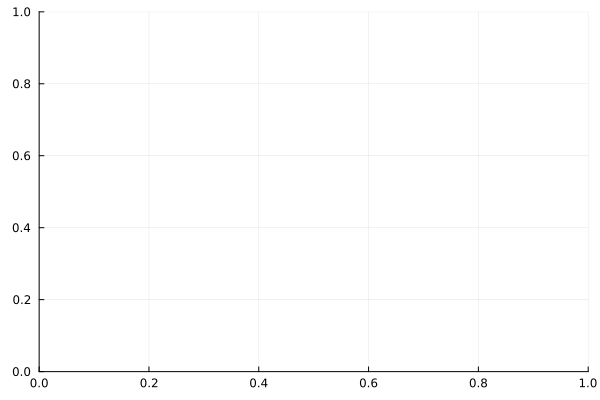

Solución óptima: [-1.0146283540277654, -1.0445303432467907, -3.0, 1.0]
Número de iteraciones: 21909
Valor de f en la solución: -1.5113194477215943
Convergencia: true


In [13]:
α = 0.0001  # Tamaño de paso
maxIter = 200000
x_opt, xk, fk, errores, iteraciones, convergencia = GradNaiveMax(f, df, x0, α, maxIter, ε, stop_criterion)
plot_results(xk, errores)
println("Solución óptima: ", x_opt)
println("Número de iteraciones: ", iteraciones)
println("Valor de f en la solución: ", f(x_opt))
println("Convergencia: ", convergencia)

### Algoritmo de Descenso Gradiente de Newton

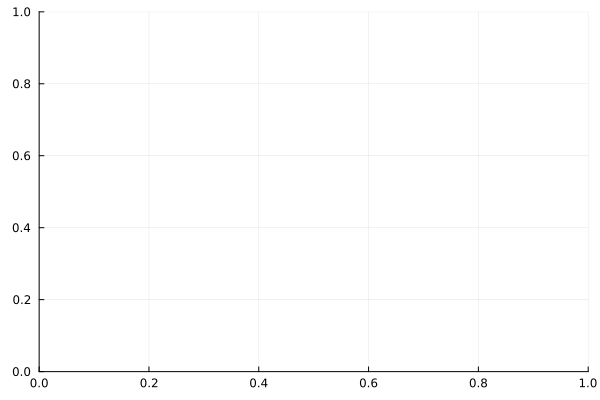

Solución óptima: [-1.0146285237539028, -1.0445304354796243, -3.0, 1.0]
Número de iteraciones: 185549
Valor de f en la solución: -1.5113194477216112
Convergencia: true


In [14]:
α = 0.0001 
maxIter = 200000
x_opt, xk, fk, errores, iteraciones, convergencia = GradNewton(f, df, x0, α, maxIter, ε, stop_criterion)
plot_results(xk, errores)
println("Solución óptima: ", x_opt)
println("Número de iteraciones: ", iteraciones)
println("Valor de f en la solución: ", f(x_opt))
println("Convergencia: ", convergencia)

### Algoritmo de Descenso Gradiente de Newton (Hessiano Exacto)

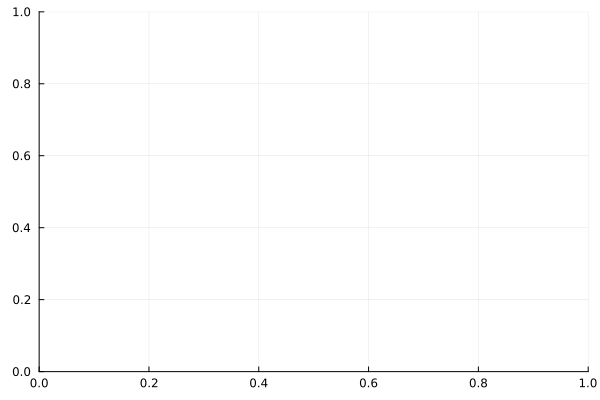

Solución óptima: [-1.0146285236866088, -1.044530435317335, -3.0, 1.0]
Número de iteraciones: 185443
Valor de f en la solución: -1.5113194477216116
Convergencia: true


In [15]:
x_opt, xk, fk, errores, iteraciones, convergencia = GradNewtonExact(f, df, ddf, x0, α, maxIter, ε, stop_criterion)
plot_results(xk, errores)
println("Solución óptima: ", x_opt)
println("Número de iteraciones: ", iteraciones)
println("Valor de f en la solución: ", f(x_opt))
println("Convergencia: ", convergencia)

**Óptimo**: $x^{*} = (-1.01463, -1.04453)^{T}, \ \ \ f(x^{*}) = -1.51132$